# <b><span style='color:#2ae4f5'>|</span> Exploratory Data Analysis (EDA)</b> 

## <b>1 <span style='color:#2ae4f5'>|</span> Import Essential Libraries</b> 

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

## <b>2 <span style='color:#2ae4f5'>|</span> Import Dataset</b> 

In [58]:
df = pd.read_excel('side_effect_data 1.xlsx')
df.head(5)

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.0,181.0
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.0
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0


## <b>3 <span style='color:#2ae4f5'>|</span> Identify the Types of Variables</b> 

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          1579 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2130 non-null   object        
 5   Ilac_Adi                          2357 non-null   object        
 6   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 7   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 8   Yan_Etki                          2357 non-null   object        
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 10  Alerjilerim                       1873 non-null 

## <b>4 <span style='color:#2ae4f5'>|</span> Summary Statistics</b> 

In [60]:
df.describe()

,Kullanici_id,Dogum_Tarihi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki_Bildirim_Tarihi,Kilo,Boy
count,2357.000000,2357,2357,2357,2357,2064.000000,2243.000000
mean,97.216801,1974-11-25 04:06:12.677131936,2022-01-07 10:47:36.173101312,2022-03-10 16:25:27.365294848,2022-02-10 17:09:30.742044928,80.863857,174.638431
min,1.000000,1939-10-12 00:00:00,2022-01-01 00:00:00,2022-03-02 00:00:00,2022-02-01 04:34:33,50.000000,145.000000
25%,47.000000,1959-02-05 00:00:00,2022-01-04 00:00:00,2022-03-06 00:00:00,2022-02-04 05:29:20,65.000000,160.000000
50%,97.000000,1973-09-09 00:00:00,2022-01-07 00:00:00,2022-03-11 00:00:00,2022-02-09 20:53:54,83.000000,176.000000
75%,146.000000,1992-03-24 00:00:00,2022-01-11 00:00:00,2022-03-15 00:00:00,2022-02-17 07:08:01,96.000000,187.000000
max,196.000000,2011-04-25 00:00:00,2022-01-14 00:00:00,2022-03-19 00:00:00,2022-02-19 21:47:39,110.000000,203.000000
std,57.017200,NaN,NaN,NaN,NaN,18.635269,16.516552


## <b>5 <span style='color:#2ae4f5'>|</span> Detect Any Anomalies or Missing Data</b> 

In [61]:
df.isnull().sum()

Kullanici_id                          0
Cinsiyet                            778
Dogum_Tarihi                          0
Uyruk                                 0
Il                                  227
Ilac_Adi                              0
Ilac_Baslangic_Tarihi                 0
Ilac_Bitis_Tarihi                     0
Yan_Etki                              0
Yan_Etki_Bildirim_Tarihi              0
Alerjilerim                         484
Kronik Hastaliklarim                392
Baba Kronik Hastaliklari            156
Anne Kronik Hastaliklari            217
Kiz Kardes Kronik Hastaliklari       97
Erkek Kardes Kronik Hastaliklari    121
Kan Grubu                           347
Kilo                                293
Boy                                 114
dtype: int64

## <b>6 <span style='color:#2ae4f5'>|</span> Data Visualization using Histogram</b> 

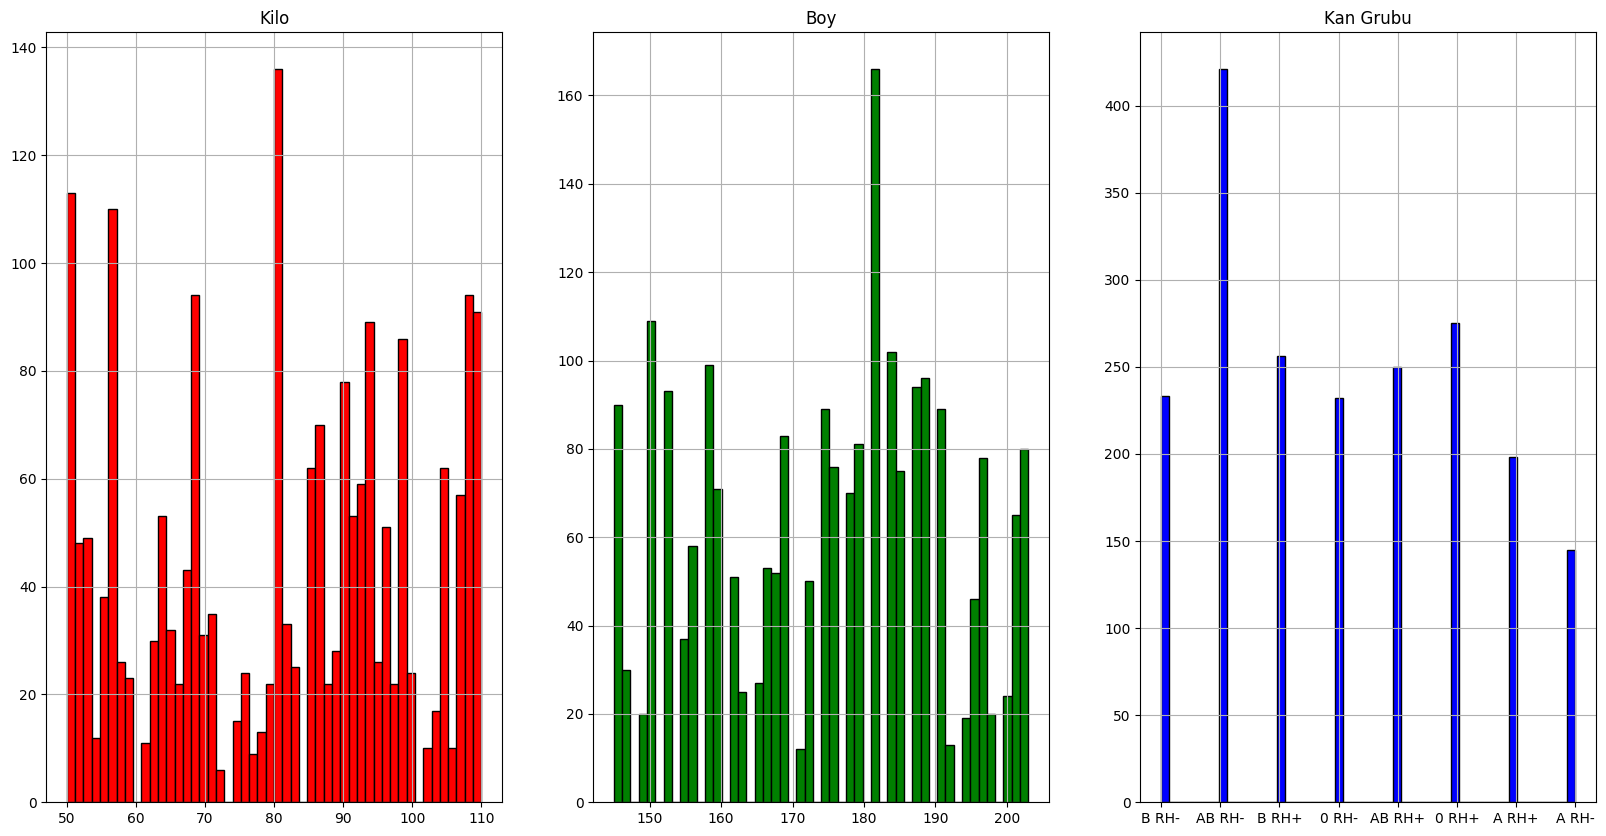

In [62]:
f,ax=plt.subplots(1,3,figsize=(20,10))
df['Kilo'].hist(ax=ax[0],bins=50, figsize=(20,10),edgecolor='black',color='red') 
ax[0].set_title('Kilo')
df['Boy'].hist(ax=ax[1],bins=50, figsize=(20,10),edgecolor='black',color='green')
ax[1].set_title('Boy')
df['Kan Grubu'].hist(ax=ax[2],bins=50, figsize=(20,10),edgecolor='black',color='blue')
ax[2].set_title('Kan Grubu')
plt.show()

## <b>7 <span style='color:#2ae4f5'>|</span> Data Visualization using Heatmap</b> 

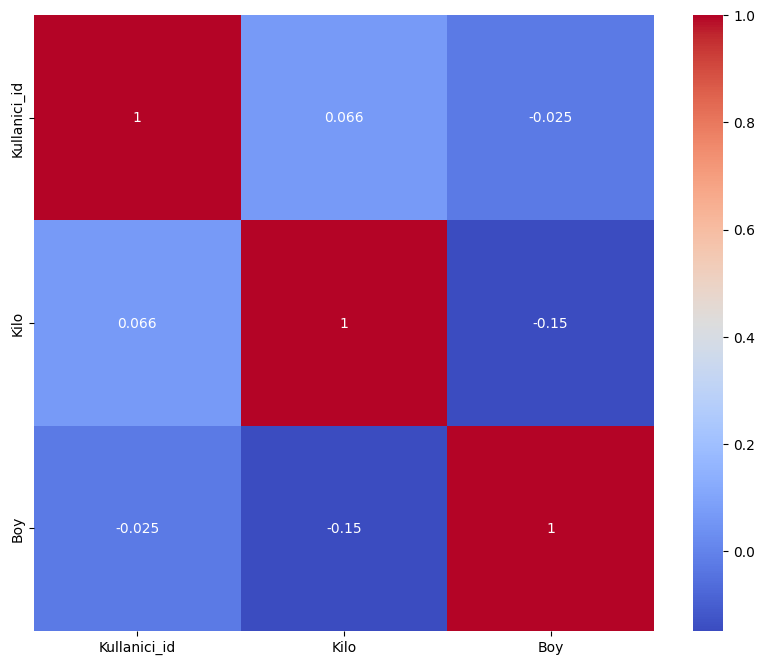

In [63]:
numeric_df = df.select_dtypes(include=[float, int])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## <b>8 <span style='color:#2ae4f5'>|</span> Data Visualization using Scatter Plot</b> 

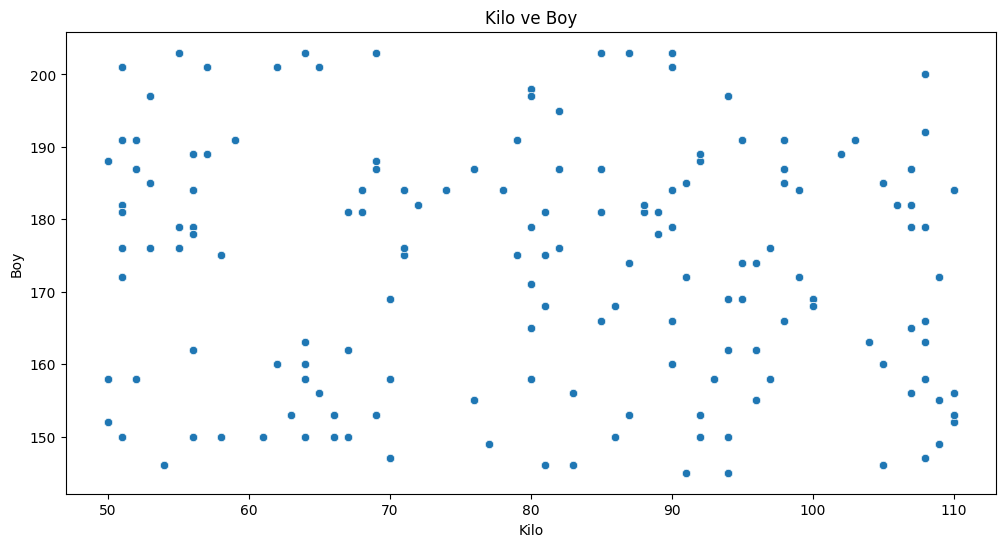

In [64]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Kilo', y='Boy')
plt.title('Kilo ve Boy')
plt.show()

# <b><span style='color:#2ae4f5'>|</span> Data Pre-Processing</b> 

## <b>9 <span style='color:#2ae4f5'>|</span> Encoding Categorical Variables using LabelEncoder</b> 

In [65]:
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

## <b>10 <span style='color:#2ae4f5'>|</span> Heatmap after Encoding</b> 

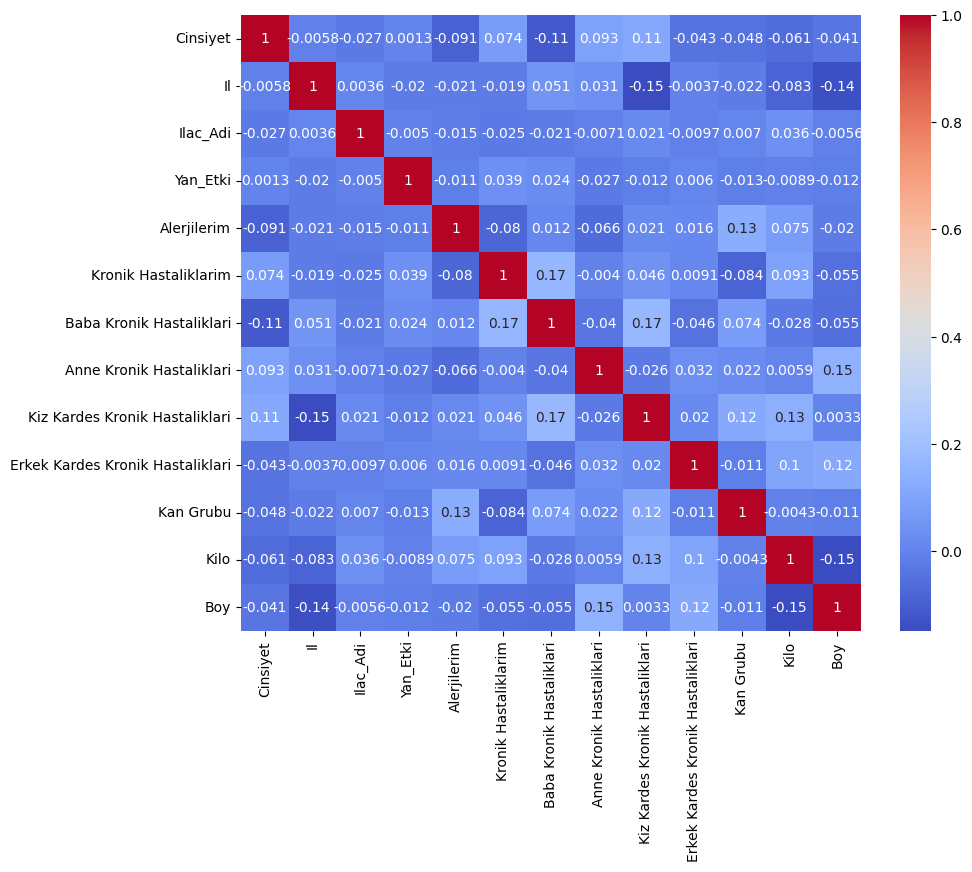

In [66]:
df = df.drop('Uyruk', axis=1, errors='ignore')
df = df.drop('Kullanici_id', axis=1, errors='ignore')
numeric_df = df.select_dtypes(include=[float, int])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## <b>11 <span style='color:#2ae4f5'>|</span> Handle Missing Data Using SimpleImputer</b> 

In [67]:
numeric_df = df.select_dtypes(include=[float, int])
imputer = SimpleImputer(strategy='mean')
df[numeric_df.columns] = imputer.fit_transform(numeric_df)
print(df.isnull().sum())

Cinsiyet                            0
Dogum_Tarihi                        0
Il                                  0
Ilac_Adi                            0
Ilac_Baslangic_Tarihi               0
Ilac_Bitis_Tarihi                   0
Yan_Etki                            0
Yan_Etki_Bildirim_Tarihi            0
Alerjilerim                         0
Kronik Hastaliklarim                0
Baba Kronik Hastaliklari            0
Anne Kronik Hastaliklari            0
Kiz Kardes Kronik Hastaliklari      0
Erkek Kardes Kronik Hastaliklari    0
Kan Grubu                           0
Kilo                                0
Boy                                 0
dtype: int64


## <b>12 <span style='color:#2ae4f5'>|</span> Normalizing Numerical Features Using StandardScaler</b> 

In [68]:
scaler = StandardScaler()
df[numeric_df.columns] = scaler.fit_transform(numeric_df)
df[numeric_df.columns].head(5)

,Cinsiyet,Il,Ilac_Adi,Yan_Etki,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
0,0.047720,-0.569822,1.455429,0.197161,-1.453249,-0.459960,-0.571937,-0.077541,1.522991,1.322011,1.029937,1.188151,0.990837
1,0.047720,1.284607,-0.137936,1.497648,1.026046,1.280209,-0.606075,-0.222708,-1.480780,0.182333,1.409956,0.007307,0.385249
2,-1.148833,-0.569822,1.637528,-0.958828,0.594864,0.107487,-0.810905,1.301540,-0.601628,-0.957344,1.029937,0.651404,-1.007604
3,0.047720,-1.497036,1.500954,0.775155,0.702660,-1.178726,0.315660,1.410415,-1.151098,0.584572,0.269899,NaN,-0.583692
4,-1.148833,0.125589,-1.093955,-1.536823,1.241637,-1.027406,-1.459534,0.793457,-0.748153,-1.393104,0.269899,0.973452,-0.159780
